# PART 3: RBM

**_TABLE OF CONTENT_**
     0. General Functions
     1. AAPL
        1.1 Train and test set size
        1.2 RBM
        1.2.1 RBM-LR
        1.2.2 RBM-SVM
        1.2.3 RBM-
     2. AMZN
     3. GOOG
     4. FB
     5. NFLX

In [1]:
import pandas as pd
import numpy as np
from datetime import date

from scipy.ndimage import convolve
from sklearn import linear_model, datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.neural_network import BernoulliRBM
from sklearn.preprocessing import Binarizer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.base import clone

from IPython.core.display import display
from helpFunctions import *
from preprocessing import create_basetable


## 0. General functions

In [2]:
start_independent = date(2020, 3, 22)
end_independent= date(2020, 11, 27)
start_dependent = date(2020,11,30)

In [3]:
def RBMMLP(x_train, x_test, y_train, y_test, learning_rate=0.1, n_iter = 10, n_components=20, batch_size=10):
    # Models we will use
    mlp = MLPClassifier(random_state=123)
    rbm = BernoulliRBM(random_state=123)
    binarizer = Binarizer()
    pipe = Pipeline(
        steps=[('binarizer', binarizer),('rbm', rbm), ('mlp', mlp)])
    # Training RBM-Logistic Pipeline
    pipe.fit(x_train, y_train)
    Y_pred = pipe.predict(x_test)
    print(metrics.classification_report(y_test, Y_pred))
    plot_confusion_matrix(y_test, Y_pred)
    plot_roc(y_test, Y_pred)
    print(metrics.roc_auc_score(y_test, Y_pred))

In [4]:
def RBMLR(x_train, x_test, y_train, y_test):
    # Models we will use
    logistic = LogisticRegression(solver='liblinear',
                                  random_state= 123)
    rbm = BernoulliRBM(random_state=123)

    binarizer = Binarizer()
    pipe = Pipeline(
        steps=[('binarizer', binarizer),('rbm', rbm), ('logistic', logistic)])
    # Training RBM-Logistic Pipeline
    pipe.fit(x_train, y_train)
    Y_pred = pipe.predict(x_test)

    print("Logistic regression using RBM features:\n%s\n" % (
    metrics.classification_report(y_test, Y_pred)))
    plot_confusion_matrix(y_test, Y_pred)
    plot_roc(y_test, Y_pred)
    print(metrics.roc_auc_score(y_test, Y_pred))


In [5]:
def RBMSVM(x_train, x_test, y_train, y_test, learning_rate = 0.01, n_components=20, n_iter = 10, batch_size=10):
    # Models we will use
    svc = SVC(random_state=123)
    rbm = BernoulliRBM(random_state=123)
    binarizer = Binarizer()
    pipe = Pipeline(
        steps=[('binarizer', binarizer),('rbm', rbm), ('svc', svc)])
    # Training RBM-Logistic Pipeline
    pipe.fit(x_train, y_train)
    Y_pred = pipe.predict(x_test)
    evaluate_model(Y_pred, y_test)
    print(metrics.roc_auc_score(y_test, Y_pred))

## 1. AAPL

In [6]:
%%time
tck = 'AAPL'
# Retrieved scaled train and test set for specified stock symbol
x_train, x_test, y_train, y_test = create_basetable(tck,
                                                  start_independent= start_independent,
                                                  end_independent= end_independent,
                                                  start_dependent= start_dependent)

Wall time: 39.4 s


Inspect the size of the training and test set

In [7]:
print(x_train.shape)
print(x_test.shape)

(151, 136)
(72, 136)


In [8]:
buy_sell_observations(y_train, y_test)

--------Training set--------
Total number of observations:  151
Number of sell observations :  63
Number of buy observations :  88

--------Test set--------
Total number of observations:  72
Number of sell observations :  40
Number of buy observations :  32


MODELS

c:\users\thijs vermeire\ideaprojects\masterthesis\venv2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\thijs vermeire\ideaprojects\masterthesis\venv2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\thijs vermeire\ideaprojects\masterthesis\venv2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

Logistic regression using RBM features:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.44      1.00      0.62        32

    accuracy                           0.44        72
   macro avg       0.22      0.50      0.31        72
weighted avg       0.20      0.44      0.27        72


0.5


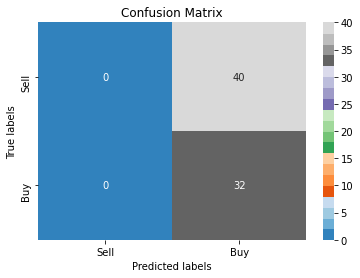

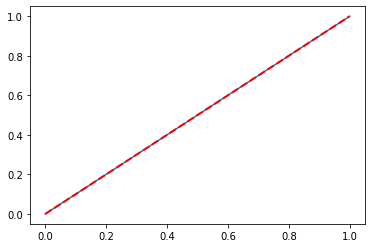

In [9]:
RBMLR(x_train,x_test, y_train, y_test)

c:\users\thijs vermeire\ideaprojects\masterthesis\venv2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\thijs vermeire\ideaprojects\masterthesis\venv2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\thijs vermeire\ideaprojects\masterthesis\venv2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.44      1.00      0.62        32

    accuracy                           0.44        72
   macro avg       0.22      0.50      0.31        72
weighted avg       0.20      0.44      0.27        72

0.5


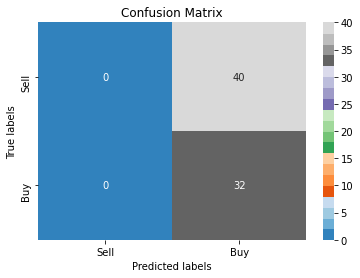

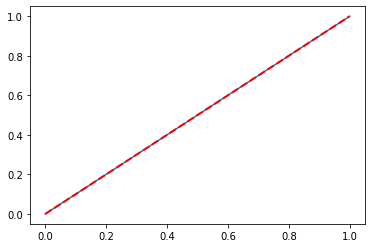

In [10]:
RBMMLP(x_train,x_test, y_train, y_test)

AUC: 0.5
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.44      1.00      0.62        32

    accuracy                           0.44        72
   macro avg       0.22      0.50      0.31        72
weighted avg       0.20      0.44      0.27        72

0.5


c:\users\thijs vermeire\ideaprojects\masterthesis\venv2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\thijs vermeire\ideaprojects\masterthesis\venv2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\thijs vermeire\ideaprojects\masterthesis\venv2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

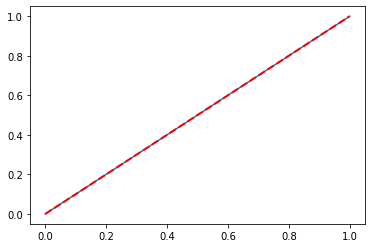

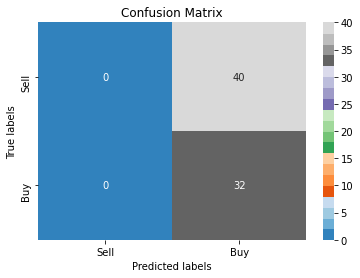

In [11]:
RBMSVM(x_train,x_test, y_train, y_test)

## 2. AMZN

In [12]:
%%time
tck = 'AMZN'
# Retrieved scaled train and test set for specified stock symbol
x_train, x_test, y_train, y_test = create_basetable(tck,
                                                  start_independent= start_independent,
                                                  end_independent= end_independent,
                                                  start_dependent= start_dependent)

Wall time: 46.1 s


Inspect the size of the training and test set

In [13]:
buy_sell_observations(y_train, y_test)

--------Training set--------
Total number of observations:  151
Number of sell observations :  60
Number of buy observations :  91

--------Test set--------
Total number of observations:  72
Number of sell observations :  37
Number of buy observations :  35


RBM-LR model

c:\users\thijs vermeire\ideaprojects\masterthesis\venv2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\thijs vermeire\ideaprojects\masterthesis\venv2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\thijs vermeire\ideaprojects\masterthesis\venv2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

Logistic regression using RBM features:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.49      1.00      0.65        35

    accuracy                           0.49        72
   macro avg       0.24      0.50      0.33        72
weighted avg       0.24      0.49      0.32        72


0.5


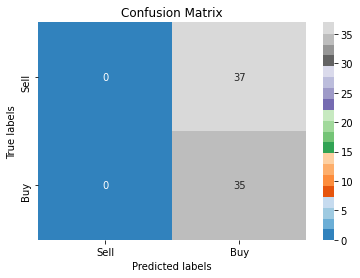

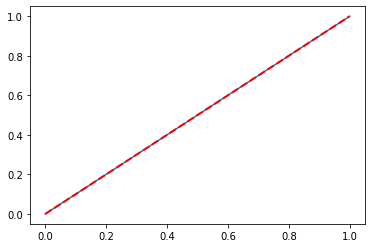

In [14]:
RBMLR(x_train,x_test, y_train, y_test)

c:\users\thijs vermeire\ideaprojects\masterthesis\venv2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\thijs vermeire\ideaprojects\masterthesis\venv2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\thijs vermeire\ideaprojects\masterthesis\venv2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.49      1.00      0.65        35

    accuracy                           0.49        72
   macro avg       0.24      0.50      0.33        72
weighted avg       0.24      0.49      0.32        72

0.5


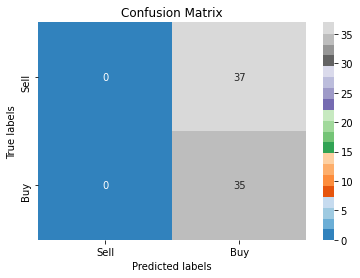

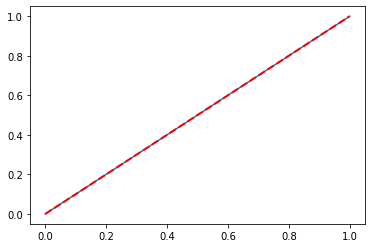

In [15]:
RBMMLP(x_train,x_test, y_train, y_test)

AUC: 0.5
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.49      1.00      0.65        35

    accuracy                           0.49        72
   macro avg       0.24      0.50      0.33        72
weighted avg       0.24      0.49      0.32        72

0.5


c:\users\thijs vermeire\ideaprojects\masterthesis\venv2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\thijs vermeire\ideaprojects\masterthesis\venv2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\thijs vermeire\ideaprojects\masterthesis\venv2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

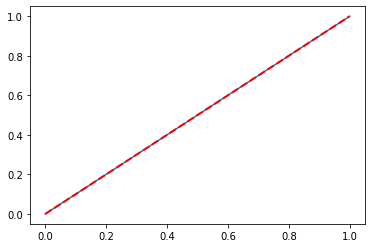

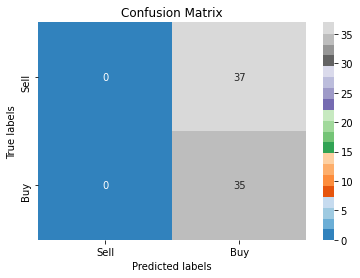

In [16]:
RBMSVM(x_train,x_test, y_train, y_test)

## 3. FB

In [17]:
%%time
tck = 'FB'
# Retrieved scaled train and test set for specified stock symbol
x_train, x_test, y_train, y_test = create_basetable(tck,
                                                  start_independent= start_independent,
                                                  end_independent= end_independent,
                                                  start_dependent= start_dependent)

Wall time: 36.5 s


Inspect the size of the training and test set

In [18]:
buy_sell_observations(y_train, y_test)

--------Training set--------
Total number of observations:  151
Number of sell observations :  62
Number of buy observations :  89

--------Test set--------
Total number of observations:  72
Number of sell observations :  36
Number of buy observations :  36


RBM-LR model

c:\users\thijs vermeire\ideaprojects\masterthesis\venv2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\thijs vermeire\ideaprojects\masterthesis\venv2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\thijs vermeire\ideaprojects\masterthesis\venv2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

Logistic regression using RBM features:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        36
           1       0.50      1.00      0.67        36

    accuracy                           0.50        72
   macro avg       0.25      0.50      0.33        72
weighted avg       0.25      0.50      0.33        72


0.5


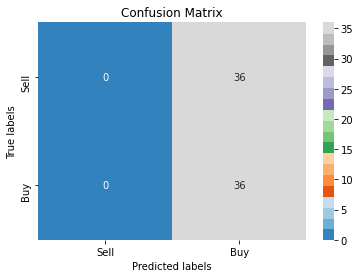

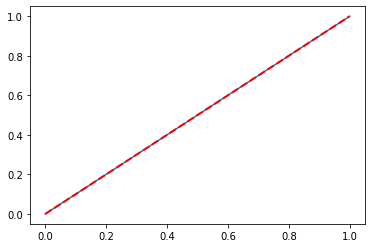

In [19]:
RBMLR(x_train,x_test, y_train, y_test)

c:\users\thijs vermeire\ideaprojects\masterthesis\venv2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\thijs vermeire\ideaprojects\masterthesis\venv2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\thijs vermeire\ideaprojects\masterthesis\venv2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        36
           1       0.50      1.00      0.67        36

    accuracy                           0.50        72
   macro avg       0.25      0.50      0.33        72
weighted avg       0.25      0.50      0.33        72

0.5


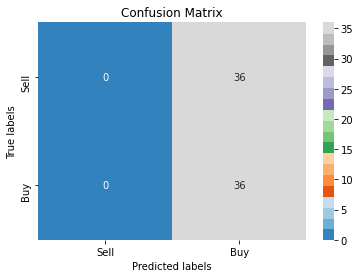

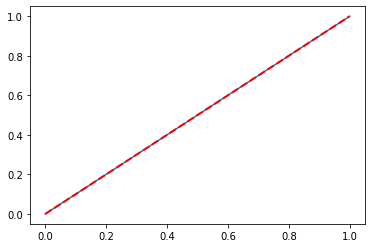

In [20]:
RBMMLP(x_train,x_test, y_train, y_test)

AUC: 0.5
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        36
           1       0.50      1.00      0.67        36

    accuracy                           0.50        72
   macro avg       0.25      0.50      0.33        72
weighted avg       0.25      0.50      0.33        72

0.5


c:\users\thijs vermeire\ideaprojects\masterthesis\venv2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\thijs vermeire\ideaprojects\masterthesis\venv2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\thijs vermeire\ideaprojects\masterthesis\venv2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

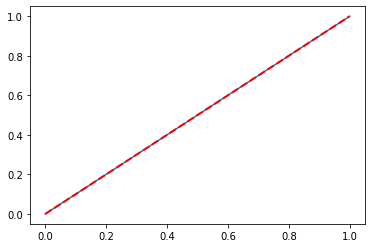

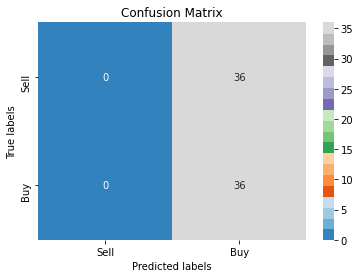

In [21]:
RBMSVM(x_train,x_test, y_train, y_test)

## 4. GOOG

In [22]:
%%time
tck = 'GOOG'
# Retrieved scaled train and test set for specified stock symbol
x_train, x_test, y_train, y_test = create_basetable(tck,
                                                  start_independent= start_independent,
                                                  end_independent= end_independent,
                                                  start_dependent= start_dependent)

Wall time: 37.2 s


Inspect the size of the training and test set

In [23]:
# Check the number of observations in the test and training set
buy_sell_observations(y_train, y_test)

--------Training set--------
Total number of observations:  151
Number of sell observations :  57
Number of buy observations :  94

--------Test set--------
Total number of observations:  72
Number of sell observations :  33
Number of buy observations :  39


RBM-LR model

c:\users\thijs vermeire\ideaprojects\masterthesis\venv2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\thijs vermeire\ideaprojects\masterthesis\venv2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\thijs vermeire\ideaprojects\masterthesis\venv2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

Logistic regression using RBM features:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.54      1.00      0.70        39

    accuracy                           0.54        72
   macro avg       0.27      0.50      0.35        72
weighted avg       0.29      0.54      0.38        72


0.5


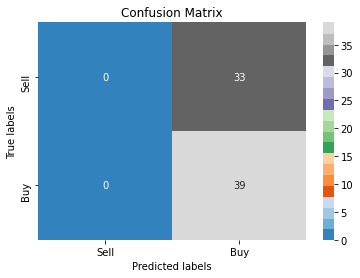

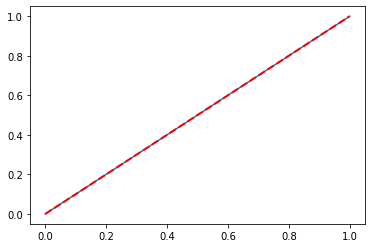

In [24]:
RBMLR(x_train,x_test, y_train, y_test)

c:\users\thijs vermeire\ideaprojects\masterthesis\venv2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\thijs vermeire\ideaprojects\masterthesis\venv2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\thijs vermeire\ideaprojects\masterthesis\venv2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.54      1.00      0.70        39

    accuracy                           0.54        72
   macro avg       0.27      0.50      0.35        72
weighted avg       0.29      0.54      0.38        72

0.5


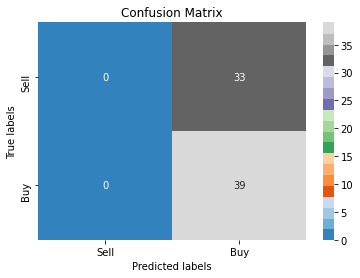

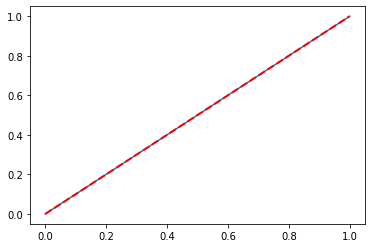

In [25]:
RBMMLP(x_train,x_test, y_train, y_test)

AUC: 0.5
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.54      1.00      0.70        39

    accuracy                           0.54        72
   macro avg       0.27      0.50      0.35        72
weighted avg       0.29      0.54      0.38        72

0.5


c:\users\thijs vermeire\ideaprojects\masterthesis\venv2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\thijs vermeire\ideaprojects\masterthesis\venv2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\thijs vermeire\ideaprojects\masterthesis\venv2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

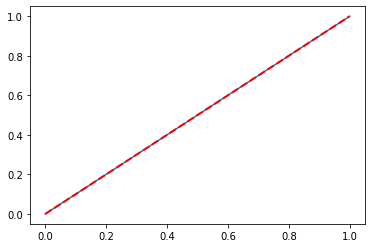

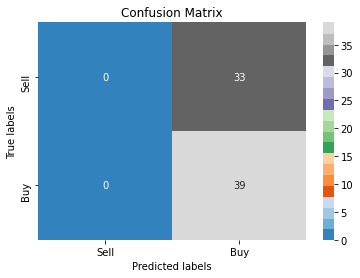

In [26]:
RBMSVM(x_train,x_test, y_train, y_test)

## 5. NFLX

In [27]:
%%time
tck = 'NFLX'
# Retrieved scaled train and test set for specified stock symbol
x_train, x_test, y_train, y_test = create_basetable(tck,
                                                  start_independent= start_independent,
                                                  end_independent= end_independent,
                                                  start_dependent= start_dependent)

Wall time: 36.8 s


Inspect the size of the training and test set

In [28]:
buy_sell_observations(y_train, y_test)

--------Training set--------
Total number of observations:  150
Number of sell observations :  68
Number of buy observations :  82

--------Test set--------
Total number of observations:  72
Number of sell observations :  38
Number of buy observations :  34


RBM-LR model

c:\users\thijs vermeire\ideaprojects\masterthesis\venv2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\thijs vermeire\ideaprojects\masterthesis\venv2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\thijs vermeire\ideaprojects\masterthesis\venv2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

Logistic regression using RBM features:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.47      1.00      0.64        34

    accuracy                           0.47        72
   macro avg       0.24      0.50      0.32        72
weighted avg       0.22      0.47      0.30        72


0.5


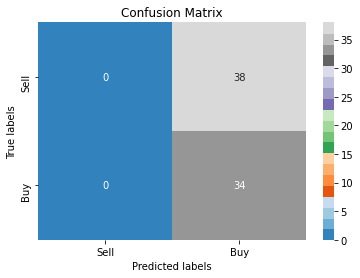

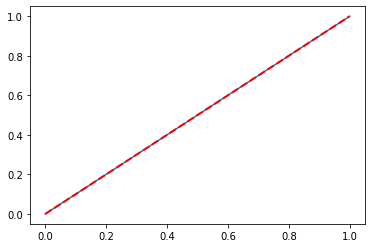

In [29]:
RBMLR(x_train,x_test, y_train, y_test)

c:\users\thijs vermeire\ideaprojects\masterthesis\venv2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.53      0.63      0.58        38
           1       0.48      0.38      0.43        34

    accuracy                           0.51        72
   macro avg       0.51      0.51      0.50        72
weighted avg       0.51      0.51      0.51        72

0.5069659442724458


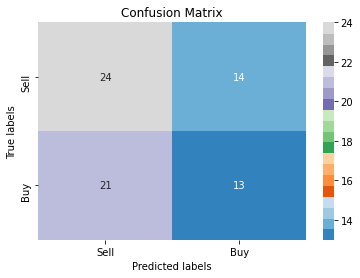

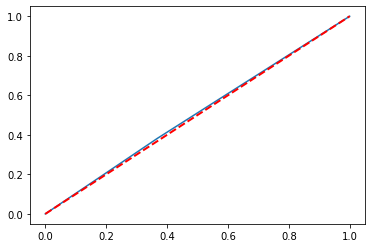

In [30]:
RBMMLP(x_train,x_test, y_train, y_test)

AUC: 0.5
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.47      1.00      0.64        34

    accuracy                           0.47        72
   macro avg       0.24      0.50      0.32        72
weighted avg       0.22      0.47      0.30        72

0.5


c:\users\thijs vermeire\ideaprojects\masterthesis\venv2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\thijs vermeire\ideaprojects\masterthesis\venv2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\thijs vermeire\ideaprojects\masterthesis\venv2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

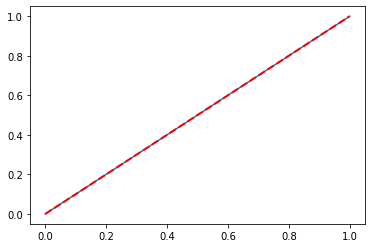

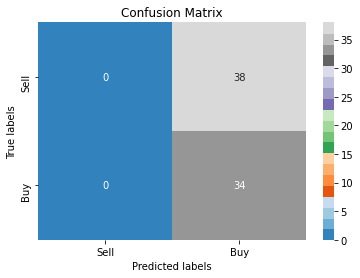

In [31]:
RBMSVM(x_train,x_test, y_train, y_test)


In [32]:
from keras.models import Sequential
# from keras.optimizers import SGD
#
# from keras_extensions.keras_extensions.logging import log_to_file
# from keras_extensions.keras_extensions.models import SingleLayerUnsupervised
# from keras_extensions.keras_extensions.rbm import GBRBM
# from keras_extensions.keras_extensions.layers import SampleBernoulli
# from keras_extensions.keras_extensions.callbacks import make_stepped_schedule, MomentumScheduler#, UnsupervisedLoss1Logger, UnsupervisedLoss2Logger
# from keras_extensions.keras_extensions.initializers import glorot_uniform_sigm
# #from keras_extensions.preprocessing import standardize
#
# # setup model structure
# from theano.sandbox.rng_mrg import MRG_RandomStreams as RandomStreams
# import time

In [33]:
# # configuration
# input_dim = 100
# hidden_dim = 200
# batch_size = 10
# nb_epoch = 10
# lr = 0.0001  # small learning rate for GB-RBM
# momentum_schedule = [(0, 0.5), (5, 0.9)]  # start momentum at 0.5, then 0.9 after 5 epochs
#
# # setup model structure
# from theano.sandbox.rng_mrg import MRG_RandomStreams as RandomStreams
#
# print('Creating training model...')
# rbm = GBRBM(input_dim=input_dim, hidden_dim=hidden_dim, init=glorot_uniform_sigm)
# rbm.srng = RandomStreams(seed=123)
# train_model = SingleLayerUnsupervised()
# train_model.add(rbm)
#
# # setup optimizer, loss
# momentum_schedule = make_stepped_schedule([(0, 0.5), (5, 0.9)])
# momentum_scheduler = MomentumScheduler(momentum_schedule)
#
# opt = SGD(lr, 0., decay=0.0, nesterov=False)
#
# contrastive_divergence = rbm.contrastive_divergence_loss(nb_gibbs_steps=1)
#
# # compile theano graph
# print('Compiling Theano graph...')
# train_model.compile(optimizer=opt, loss=contrastive_divergence)
#
# # do training
# print('Training...')
# begin_time = time.time()
#
# #callbacks = [momentum_scheduler, rec_err_logger, free_energy_gap_logger]
# callbacks = [momentum_scheduler]
# train_model.fit(x_train, batch_size, nb_epoch, verbose=1, shuffle=False, callbacks=callbacks)
#
# end_time = time.time()
#
# print('Training took %f minutes' % ((end_time - begin_time)/60.0))
#
# # save model parameters
# print('Saving model...')
# rbm.save_weights('example.hdf5', overwrite=True)
#
# # load model parameters
# print('Loading model...')
# rbm.load_weights('example.hdf5')
#
# # generate hidden features from input data
# print('Creating inference model...')
# h_given_x = rbm.get_h_given_x_layer()
# inference_model = Sequential([h_given_x, SampleBernoulli(mode='maximum_likelihood')])
#
# print('Compiling Theano graph...')
# inference_model.compile(opt, loss='mean_squared_error') # XXX: optimizer and loss are not used!
#
# print('Doing inference...')
# # h = inference_model.predict(dataset)
#
# # print(h)
# print('Done!')

